# QQ Plot
Generates some random (non-normal) data, and produces a QQ plot using a normal distributiion.

In [1]:
%matplotlib inline
import numpy as np
import quantfin as qf
from scipy.stats import norm
import matplotlib.pyplot as plt

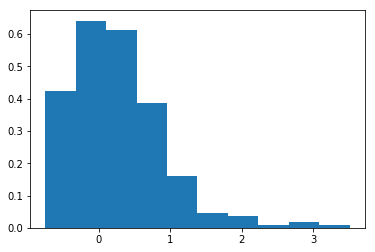

In [4]:
N = 250
# Generate random data (that isn't normally distributed)
A = qf.random.walk.geometric_brownian(N, S0=1.0, mu=0.1, sigma=0.5)
x = qf.utils.returns_from_prices(A)
plt.hist(x, density=True);

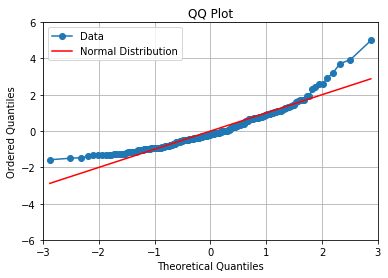

In [5]:
# Calculate theoretical and actual quantile data (using a normal distribution)
z_pred, z = qf.stats.quantile_quantile(x)

# Limits to use for axes on plot
z_max = max(abs(z).max(), abs(z_pred).max())
z_max += z_max / 5

# Plot QQ chart
plt.plot(z_pred, z, marker='o');
plt.plot(z_pred, z_pred, color='r')
plt.xlim((-3, 3))
plt.ylim((-z_max, z_max))
plt.grid(True)
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Ordered Quantiles")
plt.title("QQ Plot")
plt.legend(["Data", "Normal Distribution"]);